<a href="https://colab.research.google.com/github/poniyam/personal/blob/main/20210805_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%B6%88%EB%9F%89%EC%9A%94%EC%9D%B8_%ED%83%90%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 디스플레이 생산라인 센서 데이터 분석

## 주제 : 불량품에 영향을 주는 요인 찾기
- 결과 : "ㅇㅇ센서에서 ㅁㅁ면 불량품"
1. 주요 요인 피처 5개 추출
2. 불량품/양품 구분하는 모델도 찾아야 함


- 머신러닝 이용


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# 데이터 불러오기
import pandas as pd
df_origin = pd.read_csv('/content/gdrive/MyDrive/data/factory_glass_2016.csv', encoding='cp949')
df_origin.info()
df_origin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8145 entries, 0 to 8144
Columns: 841 entries, dat...date.name. to R.Vac
dtypes: float64(834), int64(6), object(1)
memory usage: 52.3+ MB


,dat...date.name.,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,LEHR.DRV.MTR..M7.2.SPD.1WSI40111,LEHR.DRV.MTR..M8.1.SPD.1WSI40112,LEHR.DRV.MTR..M8.2.SPD.1WSI40113,LEHR.DRV.MTR..M9.1.SPD.1WSI40114,LEHR.DRV.MTR..M9.2.SPD.1WSI40115,DRIVE.MOTOR.M10.1.SPEED.1WSI40116,LEHR.DRV.MTR..M10.2.SPD.1WSI40117,LEHR.DRV.MTR..M11.1.SPD.1WSI40118,DRIVE.MOTOR.M11.2.SPEED.1WSI40119,LEHR.DRV.MTR..M12.1.SPD.1WSI40120,LEHR.DRV.MTR..M12.2.SPD.1WSI40121,LEHR.DRV.MTR..M13.1.SPD.1WSI40122,LEHR.DRV.MTR..M13.2.SPD.1WSI40123,LEHR.DRV.MTR..M14.1.SPD.1WSI40124,LEHR.DRV.MTR..M14.2.SPD.1WSI40125,LEHR.DRV.MTR..M15.1.SPD.1WSI40126,LEHR.DRV.MTR..M15.2.SPD.1WSI40127,LEHR.DRV.MTR..M16.1.SPD.1WSI40128,DRIVE.MOTOR.M16.2.SPEED.1WSI40129,LEHR.DRV.MTR..M17.1.SPD.1WSI40130,LEHR.DRV.MTR..M17.2.SPD.1WSI40131,LEHR.DRV.MTR..M18.1.SPD.1WSI40132,LEHR.DRV.MTR..M18.2.SPD.1WSI40133,DRIVE.MOTOR.M19.1.SPEED.1WSI40134,LEHR.DRV.MTR..M19.2.SPD.1WSI40135,X1WOS45101_PV,X1WOS45102_PV,X1WOS45103_PV,X1WOS45104_PV,...,S_C1_C2_L_L,S_C1_C2_L_R,S_C2_C3_U_L,S_C2_C3_U_R,S_C2_C3_L_L,S_C2_C3_L_R,S_C3_C4_U_L,S_C3_C4_U_R,S_C3_C4_L_L,S_C3_C4_L_R,S_AB1_AB11_L,S_AB1_AB11_R,S_AB11_AB7_L,S_AB11_AB7_R,S_AB7_C4_L,S_AB7_C4_R,S_C4_RET_L,S_C4_RET_R,S_RET_F_L,S_RET_F_R,STD_U_L,STD_U_R,STD_L_L,STD_L_R,STD_GLS_L,STD_GLS_R,투입.LEFT.,투입.RIGHT.,ROLLDOWN.폐기.LEFT.,진공패드.폐기.LEFT.,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
0,2016-01-01 07,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.818900,-1.548119,-1.779407,-1.548119,-1.779407,-1.548119,-1.806012,-1.548119,-1.775051,-1.548119,-1.776634,-1.548119,-1.766604,-1.548119,-1.775051,-1.638207,-1.728206,-1.674911,-1.641818,-1.662151,-1.636293,-1.622314,-1.653428,-1.548119,-1.807954,-1.730000,-1.315444,-1.620631,-1.517655,...,-0.195736,0.706941,1.477203,0.410847,0.491620,0.942180,2.776941,2.492437,2.060406,2.612283,1.726404,1.461145,-1.192642,-1.134471,2.599429,2.690433,-0.365598,-0.659319,-1.963403,-1.621407,0.523950,1.951349,2.248106,2.767676,3.012706,3.069007,80,74,2,5,8,3,11.69,8.75,14.86,11.69,0.025,0.063,0.108,0.041
1,2016-01-01 08,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.818900,-1.548119,-1.779407,-1.548119,-1.779407,-1.548119,-1.806012,-1.548119,-1.775051,-1.548119,-1.776634,-1.548119,-1.766604,-1.548119,-1.775051,-1.638207,-1.728206,-1.674911,-1.641818,-1.662151,-1.636293,-1.622314,-1.653428,-1.548119,-1.807954,-1.730000,-1.315444,-1.620631,-1.517655,...,-0.500742,0.822657,1.495204,0.397591,0.587871,0.938186,2.888919,2.573187,2.161149,2.664726,1.682081,1.414518,-1.109125,-1.042269,2.588703,2.654307,-0.348979,-0.560103,-1.978936,-1.810022,0.566521,2.010125,2.364418,2.842630,3.022998,3.069274,92,75,0,2,10,0,7.19,2.17,13.33,7.19,0.000,0.022,0.133,0.000
2,2016-01-01 09,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.818900,-1.548119,-1.779407,-1.548119,-1.779407,-1.548119,-1.806012,-1.548119,-1.775051,-1.548119,-1.776634,-1.548119,-1.766604,-1.548119,-1.775051,-1.638207,-1.728206,-1.674911,-1.641818,-1.662151,-1.636293,-1.622314,-1.653428,-1.548119,-1.807954,-1.730000,-1.315444,-1.620631,-1.517655,...,-0.164556,0.962210,1.552127,0.460702,0.397216,0.843443,2.868644,2.486441,2.183298,2.638130,1.632955,1.359022,-0.986580,-0.928583,2.550175,2.606185,-0.456071,-0.644073,-1.878611,-1.742395,0.545936,2.002820,2.397034,2.817728,2.936967,2.969952,64,66,1,4,0,0,3.85,7.81,0.00,3.85,0.016,0.063,0.000,0.000
3,2016-01-01 10,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.818900,-1.548119,

In [ ]:
# 컬럼명 리스트 만들기
col_origin = df_origin.columns
col_origin

Index(['dat...date.name.', 'LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101',
       'LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102',
       'LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103', 'LEHR.DRV.MTR..M4.1.SPD.1WSI40104',
       'LEHR.DRV.MTR..M4.2.SPD.1WSI40105', 'LEHR.DRV.MTR..M5.1.SPD.1WSI40106',
       'LEHR.DRV.MTR..M5.2.SPD.1WSI40107', 'LEHR.DRV.MTR..M6.1.SPD.1WSI40108',
       'LEHR.DRV.MTR..M6.2.SPD.1WSI40109',
       ...
       'ROLLDOWN.폐기.RIGHT.', '진공패드.폐기.RIGHT.', '폐기율...',
       'ROLLDOWN.진공패드.폐기율..LEFT.', 'ROLLDOWN.진공패드.폐기율..RIGHT.',
       'ROLLDOWN.진공패드.폐기율..전체.', 'L.RD', 'L.Vac', 'R.RD', 'R.Vac'],
      dtype='object', length=841)

In [ ]:
# 컬럼명 확인
col_origin[:-10]

Index(['dat...date.name.', 'LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101',
       'LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102',
       'LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103', 'LEHR.DRV.MTR..M4.1.SPD.1WSI40104',
       'LEHR.DRV.MTR..M4.2.SPD.1WSI40105', 'LEHR.DRV.MTR..M5.1.SPD.1WSI40106',
       'LEHR.DRV.MTR..M5.2.SPD.1WSI40107', 'LEHR.DRV.MTR..M6.1.SPD.1WSI40108',
       'LEHR.DRV.MTR..M6.2.SPD.1WSI40109',
       ...
       'STD_U_L', 'STD_U_R', 'STD_L_L', 'STD_L_R', 'STD_GLS_L', 'STD_GLS_R',
       '투입.LEFT.', '투입.RIGHT.', 'ROLLDOWN.폐기.LEFT.', '진공패드.폐기.LEFT.'],
      dtype='object', length=831)

In [ ]:
df_origin.iloc[:, -10:]
## 각 행은 하루에 생산한 디스플레이의 센서 데이터 ??

,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
0,8,3,11.69,8.75,14.86,11.69,0.025,0.063,0.108,0.041
1,10,0,7.19,2.17,13.33,7.19,0.000,0.022,0.133,0.000
2,0,0,3.85,7.81,0.00,3.85,0.016,0.063,0.000,0.000
3,0,0,4.96,10.29,0.00,4.96,0.000,0.103,0.000,0.000
4,0,0,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
8140,14,0,8.72,3.06,14.43,8.72,0.000,0.031,0.144,0.000
8141,13,1,8.37,3.13,13.08,8.37,0.010,0.021,0.121,0.009
8142,11,3,7.49,2.56,12.73,7.49,0.017,0.009,0.100,0.027
8143,14,3,9.00,1.85,16.50,9.00,0.000,0.019,0.136,0.029


In [ ]:
# 컬럼이름을 리스트로 변환
name_list = col_origin.tolist()

# 컬럼리스트 중 dat...date.name. 컬럼 제거
## 혼자 데이터가 수치가 아닌 문자열
name_list.remove('dat...date.name.')

# 컬럼이름에서 앞의 10글자만 모은 리스트 생성
name_list_10=[]
for name in name_list:
    name = str(name)[:10]
    name_list_10.append(name)
#name_list_10
#name_list

In [ ]:
# 컬럼명(10글자)을 키, 각 컬럼의 인덱스를 값으로 하는 딕셔너리 생성
# 이렇게 하면 컬럼명 앞 10글자가 겹치는 컬럼의 인덱스를 모아 볼 수 있으므로
# 이름이 유사한 컬럼 집단의 개수, 각 집단에 속하는 컬럼의 수를 파악하기 쉬워짐

# 빈 딕셔너리 생성
name_dict = {}

# 인덱스, 컬럼이름에 대해 반복
for index, key in enumerate(name_list_10):
    
    # 만약 key가 딕셔너리에 없으면 키, 인덱스 생성
    if key not in name_dict:
        name_dict[key] = [index]
        # 딕셔너리에 넣을 때 int가 아닌 list로 넣어야 함
    # 만약 key가 딕셔너리에 있으면 인덱스 추가
    else :
        name_dict[key].append(index)

# 확인
name_dict
#name_dict.keys()
#name_dict.items()

{'ATM.FLOW.S': [76,
  77,
  78,
  79,
  80,
  81,
  592,
  593,
  594,
  595,
  596,
  597,
  598,
  599,
  600,
  601,
  602,
  603,
  604,
  605,
  606,
  607,
  608,
  609,
  610,
  611],
 'ATM.N2.H2.': [623,
  624,
  625,
  626,
  627,
  628,
  629,
  630,
  631,
  632,
  633,
  634,
  635],
 'BATH.AMBIE': [412, 413],
 'CASHING.BL': [426],
 'CASHING.CO': [409],
 'CASHING.HO': [427],
 'DAMP.POSIT': [54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  414,
  415,
  416,
  417,
  418,
  419,
  420,
  421,
  422,
  423,
  424,
  425],
 'DB.BTM.DN.': [464, 465, 466, 467, 468],
 'DB.BTM.UP.': [461, 462, 463],
 'DB.HEAT.BO': [484, 485, 486, 487, 488, 489, 490],
 'DB.HEAT.BT': [459, 460],
 'DB.HEAT.TO': [445,
  446,
  447,
  448,
  449,
  450,
  451,
  452,
  453,
  454,
  455,
  456,
  457,
  458,
  477,
  478,
  479,
  480,
  481,
  482,
  483],
 'DB.N2.SCRE': [66, 67, 430, 431],
 'DCS_Offset': [45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  343,
  344,
  345,


In [ ]:
# 컬럼 집단의 수 : 246개
len(name_dict)

245

## 각 컬럼집단의 상관관계 확인

In [ ]:
# 'ATM.FLOW.S' 로 시작하는 컬럼 간의 상관계수 확인하기
## 만약 이름이 유사한 컬럼 간 종속성이 높다면
## 해당 컬럼 집단에서 하나만 골라 대표로 하고 전체 데이터에 대해 상관계수를 확인할 것

# 'ATM.FLOW.S' 컬럼 인덱스 리스트
col_atm = name_dict['ATM.FLOW.S']

# 데이터에서 해당 컬럼만 추출하여 저장하기
df = df_origin.iloc[:, col_atm]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8145 entries, 0 to 8144
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ROOF.HEATING.Zone.9.1JIC31109.PV      8145 non-null   float64
 1   ATM.FLOW.SECT.6.N2.H2.1FI33410.PV     8145 non-null   float64
 2   ATM.FLOW.SECT.7.N2.H2.1FI33412.PV     8145 non-null   float64
 3   ATM.FLOW.SECT.8.N2.H2.1FI33414.PV     8145 non-null   float64
 4   ATM.FLOW.SECT.9.N2.1FIC33415.PV       8145 non-null   float64
 5   ATM.FLOW.SECT.9.N2.H2.1FIC33416.PV    8145 non-null   float64
 6   ROOF.HEATING.Zone89.1JIC31189.PV      8145 non-null   float64
 7   ATM.FLOW.SECT.2.N2.1FI33401.PV        8145 non-null   float64
 8   ATM.FLOW.SECT.2.N2.H2.1FI33402.PV     8145 non-null   float64
 9   ATM.FLOW.SECT.3.N2.1FI33403.PV        8145 non-null   float64
 10  ATM.FLOW.SECT.3.N2.H2.1FI33404.PV     8145 non-null   float64
 11  ATM.FLOW.SECT.4.N

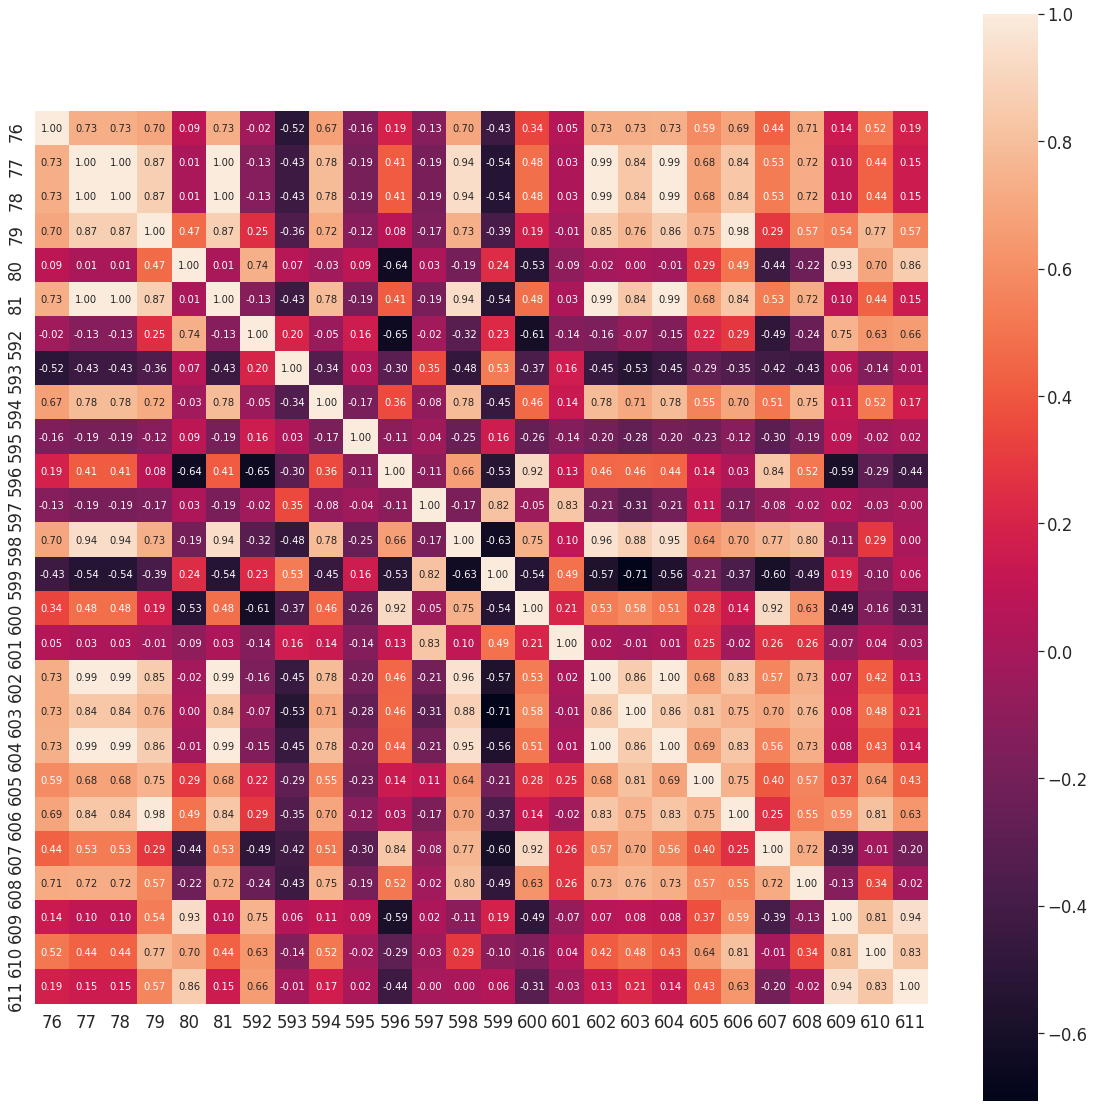

In [ ]:
# 상관계수 데이터프레임을 배열로 저장
corr_array = df.corr().to_numpy()
#print(corr_array.shape)    # (26,26)

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.set(font_scale=1.5)
sns.heatmap(corr_array, cbar=True, square=True, fmt='.2f', annot=True,
           annot_kws={'size':10}, yticklabels=col_atm, xticklabels=col_atm)
plt.show()

### 중간결론
###'ATM.FLOW.S'로 시작하는 컬럼집단의 상관관계 확인 결과
- 'ATM.FLOW.S'
- 00, 500, 600 번대 센서데이터 있음
- 상관관계가 0.6 이상으로 높은 컬럼이 다수 존재함

### 종속성 높은 컬럼은 1개만 선택
- 상관관계 0.6 이상인 컬럼 중 1개만 선택함 (먼저 등장한 컬럼을 선택)

### 종속성 낮은 컬럼을 추림
- 상관관계 분석, 기술통계량 분석 수행

## 자동화
* 각 컬럼 집단 내 상관계수를 구하고
* 종속성 높은 컬럼은 1개만 선택
    * 상관관계 0.6 이상인 컬럼 중 1개만 선택함 (먼저 등장한 컬럼을 선택)

In [ ]:
# 딕셔너리 키를 리스트로 저장
key_list = []
for key in name_dict.keys():
    key_list.append(key)
key_list

['LIFT.OUT.R',
 'LEHR.DRV.M',
 'DRIVE.MOTO',
 'X1WOS45101',
 'X1WOS45102',
 'X1WOS45103',
 'X1WOS45104',
 'X1WOS45105',
 'X1WOS45106',
 'X1WOS45107',
 'X1WOS45108',
 'X1WOS45109',
 'X1WOS45110',
 'DCS_Offset',
 'DAMP.POSIT',
 'DB.N2.SCRE',
 'N2.TO.EA13',
 'ROOF.HEATI',
 'ATM.FLOW.S',
 'SEC11.N2.1',
 'SEC11.N2.H',
 'cluster',
 'ML.Speed',
 'Ribbon.Spe',
 'Gross.widt',
 'Left.edge',
 'Right.edge',
 'UPPER.AB1.',
 'LOWER.AB1.',
 'UPPER.AB2.',
 'LOWER.AB2.',
 'UPPER.AB3.',
 'LOWER.AB3.',
 'UPPER.AB4.',
 'LOWER.AB4.',
 'UPPER.AB5.',
 'LOWER.AB5.',
 'UPPER.AB6.',
 'LOWER.AB6.',
 'UPPER.AB7.',
 'LOWER.AB7.',
 'UPPER.AB8.',
 'LOWER.AB8.',
 'UPPER.AB9.',
 'LOWER.AB9.',
 'UPPER.AB10',
 'LOWER.AB10',
 'UPPER.AB11',
 'LOWER.AB11',
 'UPPER.C1..',
 'LOWER.C1..',
 'UPPER.C2..',
 'LOWER.C2..',
 'UPPER.C3..',
 'LOWER.C3..',
 'UPPER.C4..',
 'LOWER.C4..',
 'UPPER.RET.',
 'TMP.GLASS.',
 'TMP.TIN..B',
 'X.10.BAY.L',
 'X.10.BAY.R',
 'X.1.BAY.LE',
 'X.1.BAY.RI',
 'X.7.BAY.LE',
 'X.7.BAY.RI',
 'X.1.LEHR.S',
 

In [ ]:
# 상관계수 데이터프레임 생성 함수
# 키를 입력하면 해당 키에 속하는 컬럼간 상관계수 데이터프레임 생성
# 키 : 컬럼 집단명
def make_corr_df(key):
    # 컬럼 인덱스 리스트
    col_atm = name_dict[key]
    # 데이터에서 해당 컬럼만 추출하여 저장하기
    df_corr = df_origin.iloc[:, col_atm]

    df_corr = df_corr.corr()

    #print('1-', df_corr)

    return df_corr


# 상관계수 시각화 함수
# 키를 입력하면 해당 키에 속하는 컬럼간 상관계수 히트맵 생성
def make_heatmap(key):
    
    # 컬럼 인덱스 리스트
    col_atm = name_dict[key]
    # 상관계수 데이터프레임 생성
    df_corr = make_corr_df(key)
    
    # 상관계수 데이터프레임을 배열로 저장
    corr_array = df_corr.to_numpy()

    # 상관계수 히트맵 그리기
    plt.figure(figsize=(14,14))
    sns.set(font_scale=1.5)
    sns.heatmap(corr_array, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, yticklabels=col_atm, xticklabels=col_atm)
    plt.show()

In [ ]:
# make_corr 함수 확인
df_corr = make_corr_df('LIFT.OUT.R')
df_corr.describe()

,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,UPPER.RET..Z218.TMP.1TIC42601.PV,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101.1,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102.1,LEHR.DRV.MTR..M19.2.SPD.1WSI40135.1,LIFT.OUT.ROL.MTR.M1.CUR.1WII40101.PV,LIFT.OUT.ROL.MTR.M2.CUR.1WII40102.PV
count,7.000000,7.000000,0.0,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.664335,0.671524,NaN,0.670041,0.670300,0.670682,0.189239,0.134128
std,0.564266,0.552300,NaN,0.557962,0.557493,0.555521,0.508375,0.545904
min,-0.199014,-0.175137,NaN,-0.184831,-0.183871,-0.180350,-0.123036,-0.199014
25%,0.433689,0.446647,NaN,0.442237,0.442670,0.443536,-0.106819,-0.184351
50%,0.991691,0.991978,NaN,0.992003,0.991978,0.990710,-0.103342,-0.180350
75%,0.995145,0.995266,NaN,0.999319,0.999328,0.998672,0.382344,0.343483
max,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


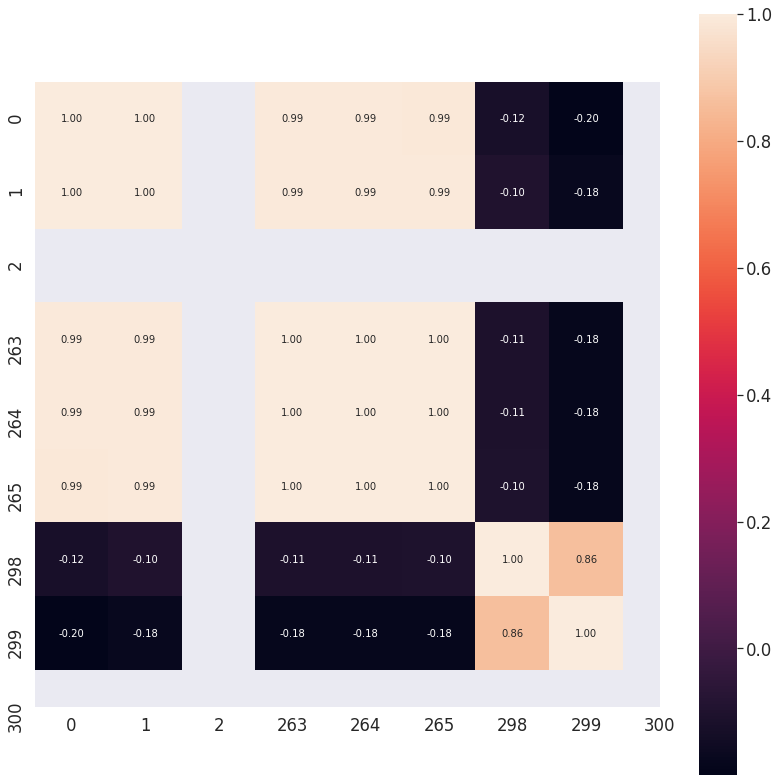

In [ ]:
# make_heatmap 함수 확인
make_heatmap('LIFT.OUT.R')

In [ ]:
# 각 컬럼집단(키) 내 컬럼간 상관계수를 구하고
df_corr = make_corr_df('LIFT.OUT.R')
#df_corr.describe()

# 상관계수의 절대값이 0.6 이상인 컬럼 중 1개만 선택함 (먼저 등장한 컬럼을 선택)
# 상관계수에 절대값 취함
df_abs = df_corr.abs()

# 데이터프레임의 한 줄을 시리즈로 저장
seri = df_abs.iloc[:, 0]

# 선택한 컬럼을 저장할 리스트 생성
col_select=[]

# 상관계수가 0.6 이하인 컬럼을 고르고, 해당 컬럼명을 리스트 저장
#col_select.append(seri[seri<0.6].index)
col = seri[seri<0.6].index
for i in col:
    col_select.append(i)

# 상관계수가 0.6 이상인 컬럼 중 1개의 컬럼명을 리스트 저장
col_select.append(seri[seri>0.6].index[0])
col_select

['LIFT.OUT.ROL.MTR.M1.CUR.1WII40101.PV',
 'LIFT.OUT.ROL.MTR.M2.CUR.1WII40102.PV',
 'LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101']

In [ ]:
# 각 컬럼집단(키) 내 종속성 높은 컬럼들은 1개만 추가함
def key_col_select(key):
    print(key)
    df_corr = make_corr_df(key)
    #print("1", df_corr)
    
    # 상관계수의 절대값이 0.6 이상인 컬럼 중 1개만 선택함 (먼저 등장한 컬럼을 선택)
    df_abs = df_corr.abs()

    # 데이터프레임의 한 줄을 시리즈로 저장
    seri = df_abs.iloc[:, 0]

    # 선택한 컬럼을 저장할 리스트 생성
    col_select=[]

    # 상관계수가 0.6 이하인 컬럼을 고르고, 해당 컬럼명을 리스트 저장
    #col_select.append(seri[seri<0.6].index)
    col = seri[seri<0.6].index
    for i in col:
        col_select.append(i)

    # 상관계수가 0.6 이상인 컬럼 중 1개의 컬럼명을 리스트 저장
    col_select.append(seri[seri>0.6].index[0])
    #print(type(col_select))
    return col_select

In [ ]:
# 확인
key_col_select('LIFT.OUT.R')

LIFT.OUT.R


['LIFT.OUT.ROL.MTR.M1.CUR.1WII40101.PV',
 'LIFT.OUT.ROL.MTR.M2.CUR.1WII40102.PV',
 'LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101']

In [ ]:
# 종속성 높은 컬럼 제거한 컬럼명 리스트
# 딕셔너리의 각 키에 대해서 반복 수행
col_select_list=[]
for key in key_list:
    col_select_list = col_select_list.__add__(key_col_select(key))

LIFT.OUT.R
LEHR.DRV.M
DRIVE.MOTO
X1WOS45101
X1WOS45102
X1WOS45103
X1WOS45104
X1WOS45105
X1WOS45106
X1WOS45107
X1WOS45108
X1WOS45109
X1WOS45110
DCS_Offset
DAMP.POSIT
DB.N2.SCRE
N2.TO.EA13
ROOF.HEATI
ATM.FLOW.S
SEC11.N2.1
SEC11.N2.H
cluster
ML.Speed
Ribbon.Spe
Gross.widt
Left.edge
Right.edge
UPPER.AB1.
LOWER.AB1.
UPPER.AB2.
LOWER.AB2.
UPPER.AB3.
LOWER.AB3.
UPPER.AB4.
LOWER.AB4.
UPPER.AB5.
LOWER.AB5.
UPPER.AB6.
LOWER.AB6.
UPPER.AB7.
LOWER.AB7.
UPPER.AB8.
LOWER.AB8.
UPPER.AB9.
LOWER.AB9.
UPPER.AB10
LOWER.AB10
UPPER.AB11
LOWER.AB11
UPPER.C1..
LOWER.C1..
UPPER.C2..
LOWER.C2..
UPPER.C3..
LOWER.C3..
UPPER.C4..
LOWER.C4..
UPPER.RET.
TMP.GLASS.
TMP.TIN..B
X.10.BAY.L
X.10.BAY.R
X.1.BAY.LE
X.1.BAY.RI
X.7.BAY.LE
X.7.BAY.RI
X.1.LEHR.S
X.1.LEHR.O
X.2.LEHR.S
X.2.LEHR.O
CASHING.CO
RET.AMBIAN
BATH.AMBIE
CASHING.BL
CASHING.HO
EXIT.LIP.P
E.L.DB.LEF
E.L.DB.RIG
N2.TO.HOOD
DROSS.BOX.
LEHR.AB1.P
DB.HEAT.TO
DB.HEAT.BT
DB.BTM.UP.
DB.BTM.DN.
HOOD.N2.TO
HOOD.N2.HE
DROSSBOX.N
DB.HEAT.BO
ROOF.HT.BA
DDP.LEFT.N
SPOUT

In [ ]:
len(col_select_list)

592

In [ ]:
# 컬럼명 리스트
# 이름 앞글자 10개가 비슷한 컬럼 간의 종속성이 높은 컬럼 삭제함
# 592개의 컬럼으로 기술통계, 상관관계 등 확인 진행할 예정
print(col_select_list)

['LIFT.OUT.ROL.MTR.M1.CUR.1WII40101.PV', 'LIFT.OUT.ROL.MTR.M2.CUR.1WII40102.PV', 'LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101', 'LIFT.OUT.ROL.MTR.M3.CUR.1WII40103.PV', 'LEHR.DRV.MTR..M4.1.CUR.1WII40104.PV', 'LEHR.DRV.MTR..M4.2.CUR.1WII40105.PV', 'LEHR.DRV.MTR..M5.1.CUR.1WII40106.PV', 'LEHR.DRV.MTR..M5.2.CUR.1WII40107.PV', 'LEHR.DRV.MTR..M6.1.CUR.1WII40108.PV', 'LEHR.DRV.MTR..M6.2.CUR.1WII40109.PV', 'LEHR.DRV.MTR..M7.1.CUR.1WII40110.PV', 'LEHR.DRV.MTR..M7.2.CUR.1WII40111.PV', 'LEHR.DRV.MTR..M8.1.CUR.1WII40112.PV', 'LEHR.DRV.MTR..M8.2.CUR.1WII40113.PV', 'LEHR.DRV.MTR..M9.1.CUR.1WII40114.PV', 'LEHR.DRV.MTR..M9.2.CUR.1WII40115.PV', 'LEHR.DRV.MTR..M10.1.CUR.1WII40116.PV', 'LEHR.DRV.MTR..M10.2.CUR.1WII40117.PV', 'LEHR.DRV.MTR..M11.1.CUR.1WII40118.PV', 'LEHR.DRV.MTR..M11.2.CUR.1WII40119.PV', 'LEHR.DRV.MTR..M12.1.CUR.1WII40120.PV', 'LEHR.DRV.MTR..M12.2.CUR.1WII40121.PV', 'LEHR.DRV.MTR..M13.1.CUR.1WII40122.PV', 'LEHR.DRV.MTR..M13.2.CUR.1WII40123.PV', 'LEHR.DRV.MTR..M14.1.CUR.1WII40124.PV', 'LEHR.DRV.MTR.